# 一、线性核函数模型-样本1
将从一个二维示例数据集开始，该数据集可以用线性边界隔开。看看不同的C值如何线使性SVM对数据集进行处理（类似于线性/逻辑回归中的正则化项）。

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from sklearn import svm

大多数SVM的库会自动帮你添加额外的特征$x_0$以及$\theta_0$ ，所以无需手动添加

In [10]:
mat = loadmat('date/ex6data1.mat')
print(mat.keys())
# dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X = mat['X']
y = mat['y']

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


No handles with labels found to put in legend.


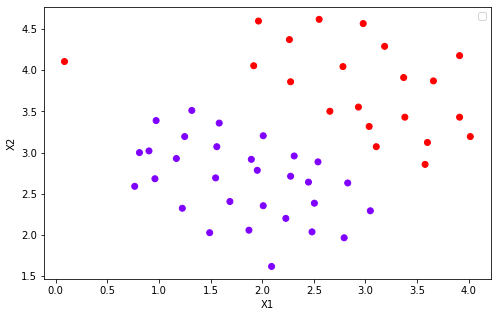

In [11]:
def plotData(X, y):
    plt.figure(figsize=(8,5))
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap='rainbow')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend() 
plotData(X, y)

In [12]:
def plotBoundary(clf, X):
    '''画出决策边界'''
    x_min, x_max = X[:,0].min()*1.2, X[:,0].max()*1.1
    y_min, y_max = X[:,1].min()*1.1,X[:,1].max()*1.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))#meshgrid函数转为网格（500*500）
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #因为predict中是要输入一个二维的数据，因此需要展开
    Z = Z.reshape(xx.shape) #重新转为网格
    plt.contour(xx, yy, Z)#画等高线

In [13]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [14]:
models = [svm.SVC(C, kernel='linear') for C in [1, 100]]
clfs = [model.fit(X, y.ravel()) for model in models]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 576x360 with 0 Axes>

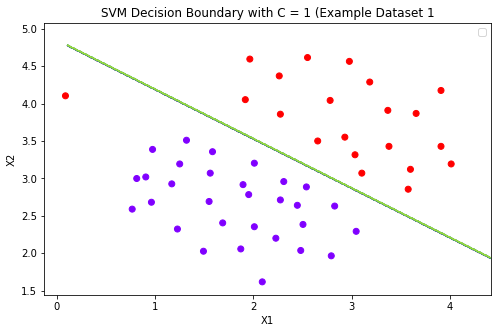

<Figure size 576x360 with 0 Axes>

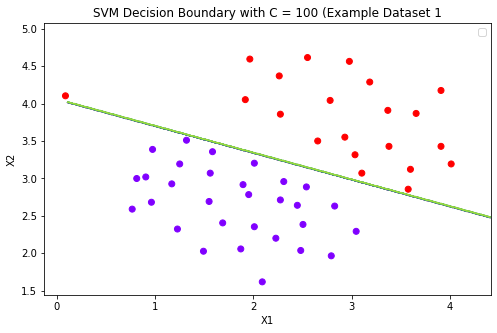

In [15]:
title = ['SVM Decision Boundary with C = {} (Example Dataset 1'.format(C) for C in [1, 100]]
for model,title in zip(clfs,title):
    plt.figure(figsize=(8,5))
    plotData(X, y)
    plotBoundary(model, X)
    plt.title(title)

### 当C=1时，支持向量机将决策边界放在两个数据集之间的间隙中，并错误地将最左边的数据点分类，但给出了比较合适的间距；当C=100时，支持向量机现在正确地对每个例子进行分类，但是它的决策边界，把异常点也正确分类了，可以看出C太大可能会过拟合,似乎并不适合数据集。

# 二、高斯核函数模型-样本2

## SVM with Gaussian Kernels（高斯核函数的SVM）
在这部分中，将使用支持向量机进行非线性分类。特别是，对于不可线性分离的数据集，将使用高斯核函数的支持向量机。
为了用SVM找出一个非线性的决策边界，首先要实现高斯核函数。
![高斯核函数](https://imgconvert.csdnimg.cn/aHR0cHM6Ly91cGxvYWQtaW1hZ2VzLmppYW5zaHUuaW8vdXBsb2FkX2ltYWdlcy8xMTAyMzI2Mi04YTQwNDg3YWZjMDA3M2Y0LnBuZw)

In [16]:
def gaussKernel(x1, x2, sigma):
    return np.exp(- ((x1 - x2) ** 2).sum() / (2 * sigma ** 2))

gaussKernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 2.)  # 0.32465246735834974

0.32465246735834974

## 可视化数据集2

In [17]:
mat = loadmat('date/ex6data2.mat')
X2 = mat['X']
y2 = mat['y']

No handles with labels found to put in legend.


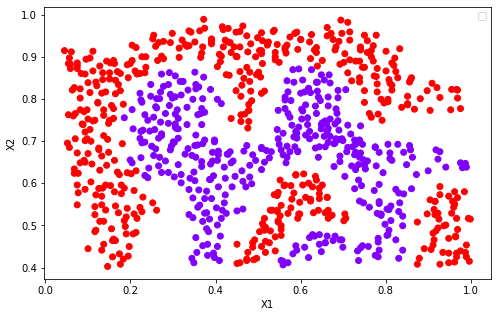

In [18]:
plotData(X2, y2)

### 样本集2可视化结果，明显非线性可分

### 画出决策边界

No handles with labels found to put in legend.


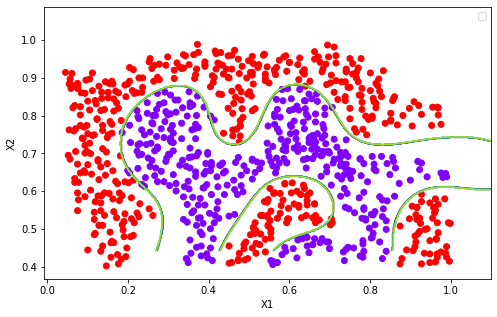

In [19]:
sigma = 0.1
gamma = np.power(sigma,-2.)/2
clf = svm.SVC(C=1, kernel='rbf', gamma=gamma)#这里使用了sklearn自带的svm中的核函数
modle = clf.fit(X2, y2.flatten())
plotData(X2, y2)
plotBoundary(modle, X2)

### C=1、sigma=0.1时的决策边界

No handles with labels found to put in legend.


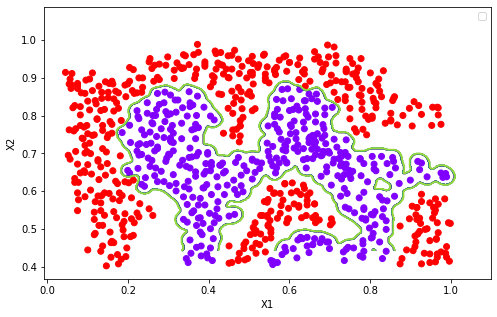

In [20]:
sigma = 0.01
gamma = np.power(sigma,-2.)/2
clf = svm.SVC(C=1, kernel='rbf', gamma=gamma)#这里使用了sklearn自带的svm中的核函数
modle = clf.fit(X2, y2.flatten())
plotData(X2, y2)
plotBoundary(modle, X2)

### C=1、sigma=0.01时的决策边界，显然过拟合了，此时simga太小了

# 三、高斯核函数模型-样本3

## 可视化训练集

No handles with labels found to put in legend.


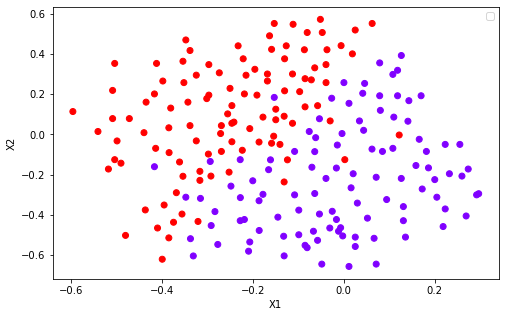

In [21]:
mat3 = loadmat('date/ex6data3.mat')
X3, y3 = mat3['X'], mat3['y']
Xval, yval = mat3['Xval'], mat3['yval']
plotData(X3, y3)

## 模型选择
使用交叉验证集Xval、yval来确定要使用的最佳C和σ参数。您应该编写任何必要的附加代码来帮助您搜索参数C和σ。对于C和σ，我们建议在乘法步骤中尝试值（例如0.01,0.03,0.1,0.3,1,3,10,30）。注意，您应该尝试所有可能的C和σ值对（例如，C=0.3和σ=0.1）。

In [22]:
Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmavalues = Cvalues
best_pair, best_score = (0, 0), 0

for C in Cvalues:
    for sigma in sigmavalues:
        gamma = np.power(sigma,-2.)/2
        model = svm.SVC(C=C,kernel='rbf',gamma=gamma)
        model.fit(X3, y3.flatten())
        this_score = model.score(Xval, yval)
        if this_score > best_score:
            best_score = this_score
            best_pair = (C, sigma)
print('best_pair={}, best_score={}'.format(best_pair, best_score))
# best_pair=(1.0, 0.1), best_score=0.965

best_pair=(1.0, 0.1), best_score=0.965


No handles with labels found to put in legend.


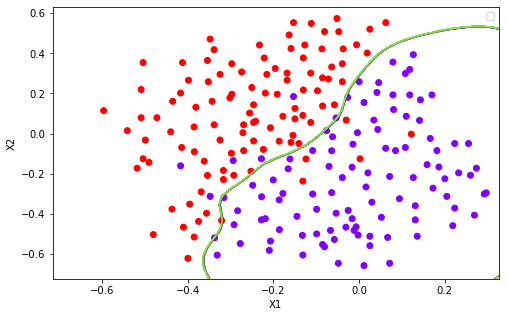

In [23]:
model = svm.SVC(C=1., kernel='rbf', gamma = np.power(.1, -2.)/2)
model.fit(X3, y3.flatten())
plotData(X3, y3)
plotBoundary(model, X3)

# 四、垃圾邮件分类器
这部分用SVM建立一个垃圾邮件分类器。需要将每个email变成一个n维的特征向量，这个分类器将判断给定一个邮件x是垃圾邮件(y=1)或不是垃圾邮件(y=0)。

In [24]:
with open('date/emailSample1.txt', 'r') as f:
    email = f.read()
    print(email)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




可以看到，邮件内容包含 a URL:http://www.rackspace.com/, an email address(at the end):groupname-unsubscribe@egroups.com, numbers:10,100, and dollar amounts. 很多邮件都会包含这些元素，但是每封邮件的具体内容可能会不一样。因此，处理邮件经常采用的方法是标准化这些数据，把所有URL当作一样，所有数字看作一样。例如，我们用唯一的一个字符串‘httpaddr’来替换所有的URL，来表示邮件包含URL，而不要求具体的URL内容。这通常会提高垃圾邮件分类器的性能，因为垃圾邮件发送者通常会随机化URL，因此在新的垃圾邮件中再次看到任何特定URL的几率非常小。
我们可以做如下处理：
  1. Lower-casing: 把整封邮件转化为小写。
  2. Stripping HTML: 移除所有HTML标签，只保留内容。
  3. Normalizing URLs: 将所有的URL替换为字符串 “httpaddr”.
  4. Normalizing Email Addresses: 所有的地址替换为 “emailaddr”
  5. Normalizing Dollars: 所有dollar符号($)替换为“dollar”.
  6. Normalizing Numbers: 所有数字替换为“number”
  7. Word Stemming(词干提取): 将所有单词还原为词源。例如，“discount”, “discounts”, “discounted” and “discounting”都替换为“discount”。
  8. Removal of non-words: 移除所有非文字类型，所有的空格(tabs, newlines, spaces)调整为一个空格.

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import re #regular expression for e-mail processing

# 这是一个可用的英文分词算法(Porter stemmer)
from stemming.porter2 import stem

# 这个英文算法似乎更符合作业里面所用的代码，与上面效果差不多
import nltk, nltk.stem.porter

In [46]:
def processEmail(email):
    """做除了Word Stemming和Removal of non-words的所有处理"""
    email = email.lower()
    email = re.sub('<[^<>]>', ' ', email)  # 匹配<开头，然后所有不是< ,> 的内容，知道>结尾，相当于匹配<...>
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email )  # 匹配//后面不是空白字符的内容，遇到空白字符则停止
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)
    email = re.sub('[\$]+', 'dollar', email)
    email = re.sub('[\d]+', 'number', email) 
    return email

### 接下来就是提取词干，以及去除非字符内容

In [47]:
def email2TokenList(email):
    """预处理数据，返回一个干净的单词列表"""
    
    # I'll use the NLTK stemmer because it more accurately duplicates the
    # performance of the OCTAVE implementation in the assignment
    stemmer = nltk.stem.porter.PorterStemmer()
    
    email = processEmail(email)

    # 将邮件分割为单个单词，re.split() 可以设置多种分隔符
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', email)
    
    # 遍历每个分割出来的内容
    tokenlist = []
    for token in tokens:
        # 删除任何非字母数字的字符
        token = re.sub('[^a-zA-Z0-9]', '', token);
        # Use the Porter stemmer to 提取词根
        stemmed = stemmer.stem(token)
        # 去除空字符串‘’，里面不含任何字符
        if not len(token): continue
        tokenlist.append(stemmed)
            
    return tokenlist  

## Vocabulary List(词汇表)
在对邮件进行预处理之后，我们有一个处理后的单词列表。下一步是选择我们想在分类器中使用哪些词，我们需要去除哪些词。

我们有一个词汇表vocab.txt，里面存储了在实际中经常使用的单词，共1899个。

我们要算出处理后的email中含有多少vocab.txt中的单词，并返回在vocab.txt中的index，这就我们想要的训练单词的索引

In [48]:
def email2VocabIndices(email, vocab):
    """提取存在单词的索引"""
    token = email2TokenList(email)
    index = [i for i in range(len(vocab)) if vocab[i] in token ]
    return index

In [49]:
def email2FeatureVector(email):
    """
    将email转化为词向量，n是vocab的长度。存在单词的相应位置的值置为1，其余为0
    """
    df = pd.read_table('date/vocab.txt',names=['words'])
    vocab = df.values  # return array
    vector = np.zeros(len(vocab))  # init vector
    vocab_indices = email2VocabIndices(email, vocab)  # 返回含有单词的索引
    # 将有单词的索引置为1
    for i in vocab_indices:
        vector[i] = 1
    return vector

In [50]:
vector = email2FeatureVector(email)
print('length of vector = {}\nnum of non-zero = {}'.format(len(vector), int(vector.sum())))

length of vector = 1899
num of non-zero = 45


## Training SVM for Spam Classification
读取已经训提取好的特征向量以及相应的标签。分训练集和测试集。

In [53]:
# Training set
mat1 = loadmat('date/spamTrain.mat')
X, y = mat1['X'], mat1['y']

# Test set
mat2 = loadmat('date/spamTest.mat')
Xtest, ytest = mat2['Xtest'], mat2['ytest']

In [54]:
clf = svm.SVC(C=0.1, kernel='linear')
clf.fit(X, y)

D:\Anaconda\envs\tf1.13\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=0.1, kernel='linear')

In [55]:
predTrain = clf.score(X, y)
predTest = clf.score(Xtest, ytest)
predTrain, predTest

(0.99825, 0.989)